# pythonではじめる機械学習

In [18]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#iris_dataset = load_iris()

## K-最近傍法

In [25]:
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_forge
from sklearn.neighbors import KNeighborsClassifier

X, y = make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
#print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## 線形モデル
### 線形回帰

In [51]:
from sklearn.linear_model import LinearRegression
X, y =  mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("この結果は過剰適合")

Training set score: 0.95
Test set score: 0.61
過剰適合


### リッジ回帰
* 係数の絶対値を可能な限り小さくするように正則化する（L2正則化）
* 線形回帰した際に過剰適合した場合、モデルをシンプルにするために使ったりする。

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("αを大きくすると正則化が大きくなり、過剰適合が防がれる。結果的に汎化性能が向上する可能性がある")

Training set score: 0.89
Test set score: 0.75
αを大きくすると正則化が大きくなり、過剰適合が防がれる。結果的に汎化性能が向上する可能性がある


### Lasso回帰
* リッジ回帰と同じく正則化を強めた線形回帰の1種(L1正則化)
* リッジ回帰との違いはいくつかの係数が完全に０になり、モデルがシンプルになる。

In [57]:
from sklearn.linear_model import Lasso
lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Nomber of features used: {}".format(np.sum(lasso001.coef_ != 0)))
print("αを大きくしすぎると過剰適合するので注意")

Training set score: 0.90
Test set score: 0.77
Nomber of features used: 33


## 決定木

Accuracy on  training set: 0.988
Accuracy on  test set: 0.951
Feature importance:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


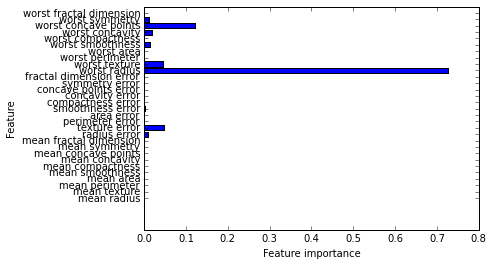

In [74]:
from sklearn.tree import DecisionTreeClassifier
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on  training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on  test set: {:.3f}".format(tree.score(X_test, y_test)))
print("Feature importance:\n{}".format(tree.feature_importances_))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_ ,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)
    

## ランダムフォレスト

Accuracy on  training set: 1.000
Accuracy on  test set: 0.972


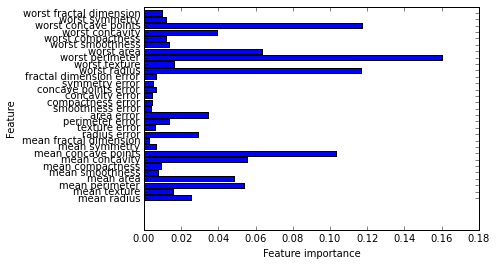

In [79]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
print("Accuracy on  training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on  test set: {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances_cancer(forest)

## 勾配Boosting回帰木

Accuracy on  training set: 0.988
Accuracy on  test set: 0.965


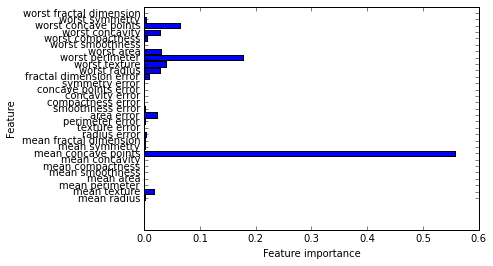

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01) #,max_depth=1
gbrt.fit(X_train, y_train)
print("Accuracy on  training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on  test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances_cancer(gbrt)

## SVM

In [99]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train -  min_on_training).max(axis = 0)
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on  training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on  test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on  training set: 0.988
Accuracy on  test set: 0.972


## 教師なし学習
### 主成分分析

Original shape : (569, 30)
Reduced shape : (569, 2)


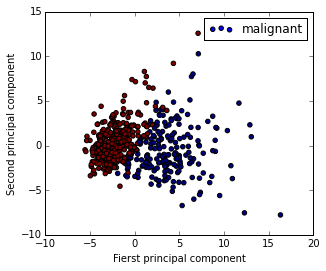

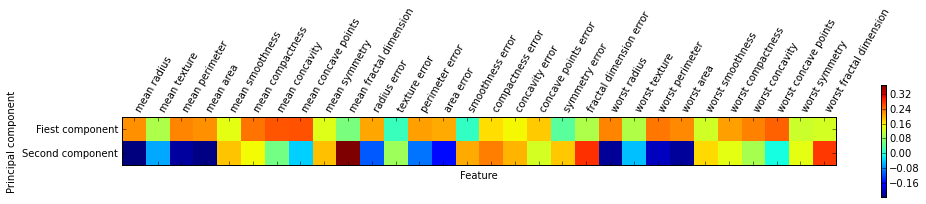

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape : {}".format(str(X_scaled.shape)))
print("Reduced shape : {}".format(str(X_pca.shape)))

# PCA結果を可視化
plt.scatter(X_pca[ : ,0],X_pca[ : ,1] ,c = cancer.target)
plt.legend(cancer.target_names, loc ="best")
plt.gca().set_aspect("equal")  #plotする際、縦横比を同じにする
plt.xlabel("Fierst principal component")
plt.ylabel("Second principal component")

# 各主成分の貢献率をヒートマップで可視化

plt.matshow(pca.components_ , cmap = "jet" ) 
plt.yticks([0,1] , ["Fiest component" , "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)) , cancer.feature_names, rotation = 60 , ha = "left")
plt.xlabel("Feature")
plt.ylabel("Principal component")

Test set accuracy: 0.28
Test set accuracy: 0.34
PCA後のデータで分類した方が精度がよい


'\nfix , axes = plt.subplots(3 , 5 , figsize = (15,12) , subplot_kw = {"xticks" : () , "yticks" : ()})\nfor i , (component , ax) in enumerate(zip(pca.components_ , axes.ravel())):\n    ax.imshow(component.reshape(image_shape) , cmap = "gray")\n    ax.set_title("{}.component".format((i  + 1)))\n'

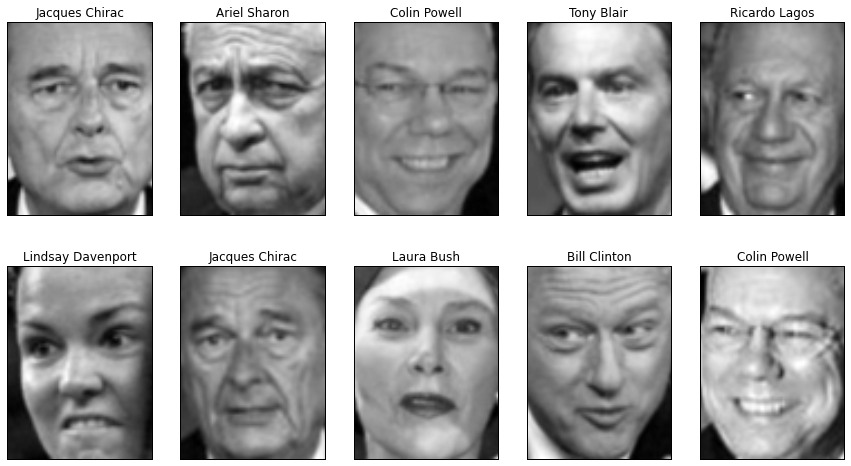

In [185]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
people = fetch_lfw_people(min_faces_per_person = 20 , resize = 0.7)
#image_shape = people.images[0].shape
fix , axes = plt.subplots(2 , 5 , figsize = (15,8) , subplot_kw = {"xticks" : () , "yticks" : ()})

for target , image , ax in zip(people.target , people.images , axes.ravel()):
    ax.imshow(image , cmap = "gray")
    ax.set_title(people.target_names[target])

# 偏りを減らすために各人の画像を50に制限する
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(X_people , y_people , stratify = y_people , random_state = 0)
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train , y_train)
knn2.fit(X_train_pca , y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))
print("Test set accuracy: {:.2f}".format(knn2.score(X_test_pca, y_test)))
print("PCA後のデータで分類した方が精度がよい")

"""
fix , axes = plt.subplots(3 , 5 , figsize = (15,12) , subplot_kw = {"xticks" : () , "yticks" : ()})
for i , (component , ax) in enumerate(zip(pca.components_ , axes.ravel())):
    ax.imshow(component.reshape(image_shape) , cmap = "gray")
    ax.set_title("{}.component".format((i  + 1)))
"""    

##  NMF

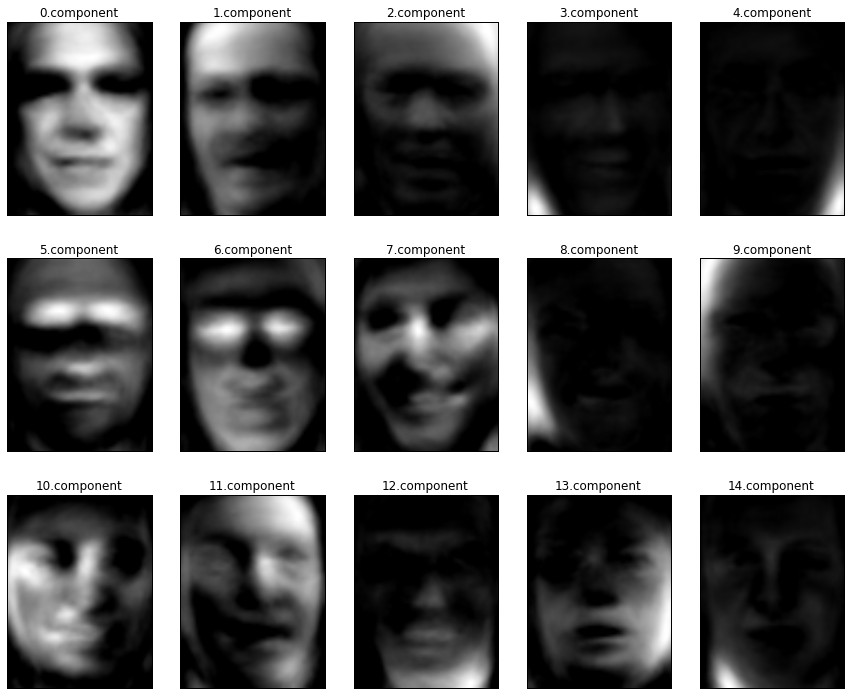

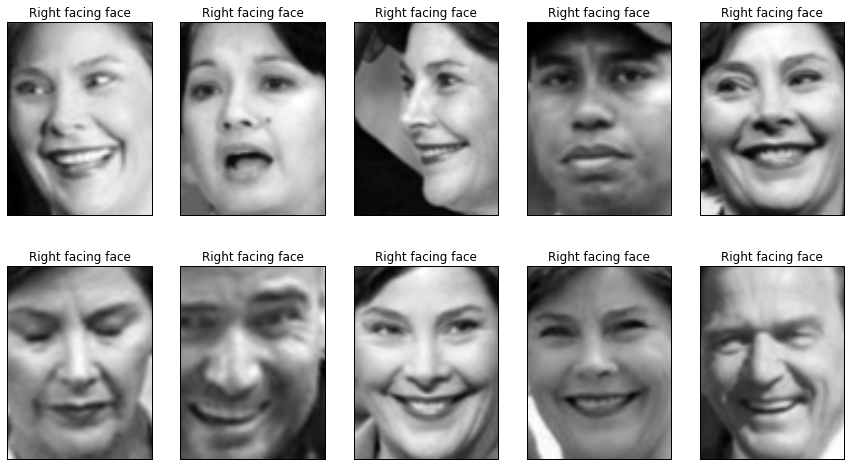

In [188]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15,  random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix , axes = plt.subplots(3 , 5 , figsize = (15,12) , subplot_kw = {"xticks" : () , "yticks" : ()})
for i , (component , ax) in enumerate(zip(nmf.components_ , axes.ravel())):    
    ax.imshow(component.reshape(image_shape) , cmap = "gray")
    ax.set_title("{}.component".format((i )))

#右向きの顔の成分が大きい（成分7）顔を表示
inds = np.argsort(X_train_nmf[:,7])[::-1]
fix , axes = plt.subplots(2 , 5 , figsize = (15,8) , subplot_kw = {"xticks" : () , "yticks" : ()})
for  ind , ax in zip(inds , axes.ravel()):    
    ax.imshow(X_train[ind].reshape(image_shape) , cmap = "gray")
    ax.set_title("Right facing face")

## t-SNE
pcaよりもt-SNEの方が数字データをうまく分離できる

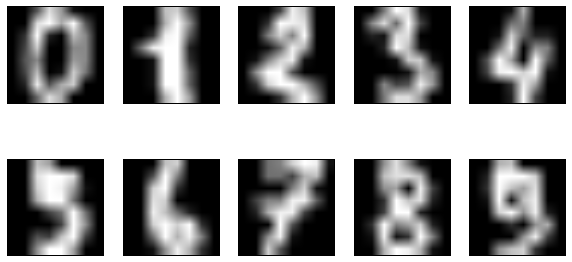

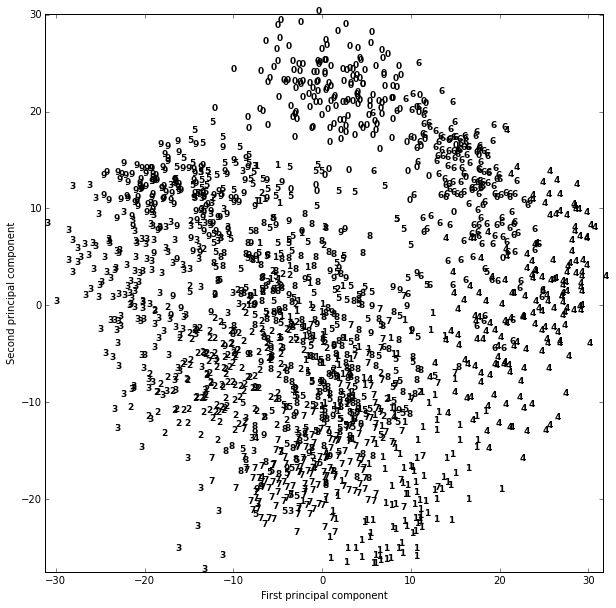

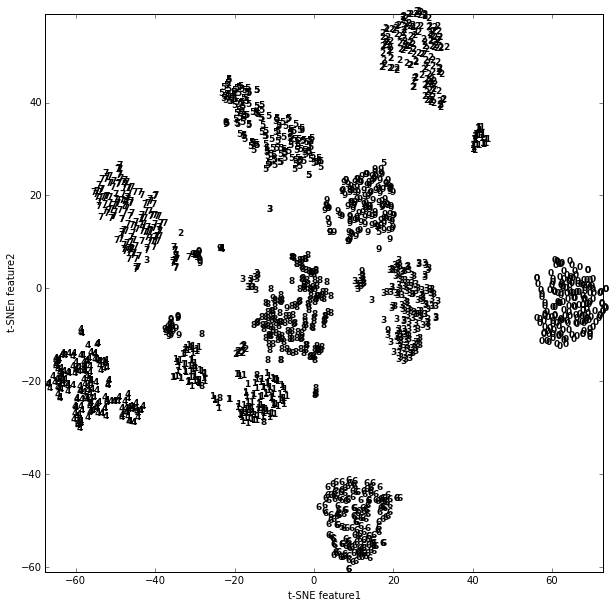

In [227]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits() #1797個の数字
fig , axes = plt.subplots(2 , 5 , figsize = (10,5) , subplot_kw = {"xticks" : () , "yticks" : ()})
for ax , img in zip( axes.ravel() , digits.images):    
    ax.imshow(img , cmap = "gray")

pca = PCA(n_components = 2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1] , str(digits.target[i]),fontdict = {"weight":"bold","size":9})


tsne = TSNE(random_state = 42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1] , str(digits.target[i]),fontdict = {"weight":"bold","size":9})
plt.xlabel("t-SNE feature1")
plt.ylabel("t-SNEn feature2")



## k-meansクラスタリング

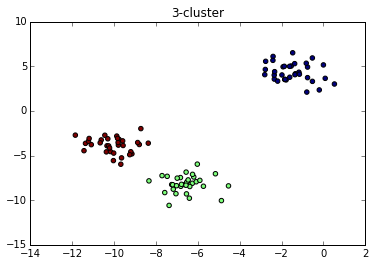

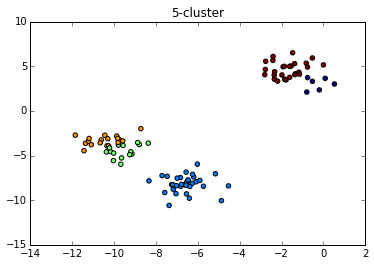

In [252]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(random_state=1) #2次元データを作る
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(X)
assignments = kmeans_3.labels_
plt.scatter(X[:,0],X[:,1],c = assignments )
plt.title("3-cluster")

plt.figure()
kmeans_5 = KMeans(n_clusters = 5)
kmeans_5.fit(X)
assignments = kmeans_5.labels_
plt.scatter(X[:,0],X[:,1],c = assignments )
plt.title("5-cluster")
